<a href="https://colab.research.google.com/github/HuberM1998/UFPel/blob/master/Relatorio1_Mathaus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Na implementação do código dos métodos númericos de bissecção, falsa posição, newton e secante, coloquei comentários a cada linha de código que achei necessária, para explicar como eu usei a lógica para chegar em cada resultado. Na Lista de exercícios 2 eu apenas utilizei esses códigos implementados anteriormente para resolver cada problema proposto, cada qual à sua maneira, com sua precisão e número de iterações diferentes.  

In [ ]:
import math

def f(x):
	#retornando a função de entrada do exemplo em questão
	return (x**10 -1)

def bissec(a, b, ite_max):

	amplitude = b - a
	#amplitude de [a;b]
	x0 = (a + b)/2.0
	#ponto médio de [a;b]
	a_f = 0.001  
	#amplitude final, nesse caso escolhi um valor bem baixo, conforme o programa for calculando as aproximações, o intervalo inicial determinado vai mudar, vai se tornar menor, então eu defini aqui um valor para essa amplitude, um valor final para esse intervalo
	precisao = 10**-4
	#tolerância
	cont = 0
	#contador dentro do laço
	
	while(amplitude > a_f or math.fabs(f(x0)) > precisao):
		#enquanto a amplitude for maior que a amplitude final (a amplitude final de [a;b] não foi atingida) ou o módulo da função de ponto médio for maior que a tolerâcia, faça:
		amplitude = b - a
		#calculando novamente o valor da amplitude
		x0 = (a+b)/2.0
		#calculando novamente uma aproximação para o valor do ponto médio
		cont = cont + 1
		#incrementando o valor do contador a cada iteração

		if(f(a)*f(x0) < 0.0):
			b = x0
		if(f(a)*f(x0) >= 0.0):
			a = x0
		#se uma das condições for satisfeita então significa o ponto médio que calculamos anteriormente vai ser guardado em um dos pontos do intervalo, então o intervalo vai mudar, provavelmente vai ficar menor
		if(cont >= ite_max):
			break
	  #pode ser que a gente entre com um intervalo que essas condições nunca sejam satisfeitas, ou seja, nossos critérios de parada nunca ocorram, caindo em um loop infinito, por isso achei interessante colocar mais um critério de parada, onde tenha certeza que esse critério será satisfeito
		
	print(' Raíz: %f\n Iterações: %i' %(x0,cont))





In [ ]:
import math

def f(x):
	#retornando a função de entrada do exemplo em questão
	return (x**10 -1)

def posicao(a, b, ite_max):
	
	amplitude = b - a
	#amplitude de [a;b]
	x0 = (a*f(b) - b*f(a)) / (f(b) - f(a))
  #calculando a equação da falsa posição
	a_f = 0.001
	#amplitude final
	precisao = 10**-4
	#tolerância
	cont = 0
	#contador dentro do laço
	while(amplitude > a_f or math.fabs(f(x0)) > precisao):
		#enquanto a amplitude for maior que a amplitude final (a amplitude final de [a;b] não foi atingida) ou o módulo da função de ponto médio for maior que a tolerâcia, faça:
		amplitude = b - a
		#calculando novamente o valor da amplitude
		x0 = (a*f(b) - b*f(a)) / (f(b) - f(a))
	  #calculando novamente uma aproximação para o valor da equação da falsa posição
		cont = cont + 1
		#incrementando o valor do contador a cada iteração

		if(f(a)*f(x0) < 0.0):
			b = x0
		if(f(a)*f(x0) >= 0.0):
			a = x0
		#se uma das condições for satisfeita então significa o valor da equação que calculamos anteriormente vai ser guardado em um dos pontos do intervalo, então o intervalo vai mudar, provavelmente vai ficar menor
		
		if(cont >= ite_max):
			break
		 #pode ser que a gente entre com um intervalo que essas condições nunca sejam satisfeitas, ou seja, nossos critérios de parada nunca ocorram, caindo em um loop infinito, por isso achei interessante colocar mais um critério de parada, onde tenha certeza que esse critério será satisfeito
	print(' Raíz: %f\n Iterações: %i' %(x0,cont))


In [ ]:
import math

def f(x):
	#retornando a função de entrada do exemplo em questão
	return (x**3 - 6*x**2 + 11*x - 6.1)

def df(x):
	h = 0.000001
	#Lembrando que a derivada podemos representar por uma equação, sendo o limite de h tendendo a zero, podemos dizer que a derivada dessa função é aproximadamente essa expressão sem o limite para um h muito pequeno.
	return ((f(x+h) - f(x))/h)
  #Aqui eu usei a formula para o cálculo da derivada por definição, nos exercícios da lista 2 eu acabei fazendo o cálculo manualmente, por não saber se realmente estava correta dessa forma (acredito que funciona bem, testei algumas vezes e deu certo), porém achei mais seguro colocar manualmente o cálculo da derivada. 
	
def newton(x0, ite_max):
	
	x = 0.0
	#variável que vai receber o valor no ponto
	precisao = 10**-5
	#tolerância
	cont = 1
	#contador dentro do laço
	
	while(math.fabs(f(x0)) > precisao):
		#enquanto o valor absoluto da minha função avaliado em x0 for maior que a tolerância, faça:
		x = x0 - f(x0)/df(x0)
	  #calculando a equação do método de newton
		x0 = x
		#x0 vai ser atualizado com esse novo valor dessa nova aproximação que foi feita
		cont = cont + 1
		#incrementando o valor do contador a cada iteração

		if(cont >= ite_max):
			print('RAÍZ NÃO ENCONTRADA')
			break
    #critério de parada para abandonar o laço, onde ele não chega a encontrar a raíz da função até bater o nosso limite de iterações
	if (cont < ite_max):
		
		print(' Raíz: %f\n Iterações: %i' %(x0,cont))
      

In [ ]:
import math

def f(x):
	#retornando a função de entrada do exemplo em questão
	return (x**3 - 6*x**2 + 11*x - 6.1)
	
def secante(x0, x1, ite_max):
	
	precisao = 10**-5
	#tolerância
	xn = 0.0
	#variável que vai receber o valor no ponto
	x = []
	#lista para guardar as aproximações
	x.append(x0)
	x.append(x1)
	#método append adiciona o valor de x0 e x1 na ultima posição da lista
	cont = 1
	#contador dentro do laço
	n = 1
	#variável que vai contar as posições dentro da equação do método da secante, começando em 1 pois quando o algoritmo fizer o calculo x(n-1) o valor de n tem que ser maior ou igual a um para não dar um número negativo, e a listas começam a contar as posições a partir do zero.
	while(math.fabs(f(x0)) > precisao):
		#enquanto o valor absoluto da minha função avaliado em x0 for maior que a tolerância, faça:
		xn = x[n] - (x[n] - x[n-1])/(f(x[n]) - f(x[n-1]))*f(x[n])
	  #calculando a equação do método da secante
		x.append(xn)
		#adicionando o valor da variavel que recebe o valor final na última posição da lista
		n = n + 1
		#incrementando o valor da váriavel n da equação da secante
		cont = cont + 1
		#incrementando o valor do contador a cada iteração
		
		if(cont >= ite_max):
			break
		#critério de parada para abandonar o laço
	print(' Raíz: %f\n Iterações: %i' %(xn,cont))

Questão 1– Determine a raiz da função f(x) = x**10 -1 com o método da bissecção e da falsa posição. Utilize cinco iterações e as aproximações iniciais a = 0 e b = 1,3. Qual dos métodos obteve melhor desempenho? Porque?

In [ ]:
import math

def f(x):
	return (x**10 -1)

def bissec(a, b, ite_max):

	amplitude = b - a
	x0 = (a + b)/2.0
	a_f = 0.001  
	precisao = 10**-4
	cont = 0
	
	while(amplitude > a_f or math.fabs(f(x0)) > precisao):
		amplitude = b - a
		x0 = (a+b)/2.0
		cont = cont + 1

		if(f(a)*f(x0) < 0.0):
			b = x0
		if(f(a)*f(x0) >= 0.0):
			a = x0
			
		if(cont >= ite_max):
			break
		
	print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))


In [ ]:
bissec (0, 1.3, 5)

 Raíz: 1.015625
 Iterações: 5
 f(1.015625) = 0.167707


In [ ]:
import math

def f(x):
	return (x**10 -1)

def posicao(a, b, ite_max):
	
	amplitude = b - a
	x0 = (a*f(b) - b*f(a)) / (f(b) - f(a))
	a_f = 0.001
	precisao = 10**-4
	cont = 0
	
	while(amplitude > a_f or math.fabs(f(x0)) > precisao):
		
		amplitude = b - a
		x0 = (a*f(b) - b*f(a)) / (f(b) - f(a))
		cont = cont + 1
		
		if(f(a)*f(x0) < 0.0):
			b = x0
		if(f(a)*f(x0) >= 0.0):
			a = x0
			
		
		if(cont >= ite_max):
			break
		
	print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))


In [ ]:
posicao(0, 1.3, 5)

 Raíz: 0.407878
 Iterações: 5
 f(0.407878) = -0.999873


Na maioria dos casos, o método da falsa posição converge mais rápido que o método da bisseção. Contudo, o algoritmo tem a desvantagem de que, se a função é convexa ou côncava próximo da solução, o ponto do intervalo mais distante da solução fica fixo, variando somente na sua vizinhança, convergindo muito lentamente (inclusive podendo ser mais lento que o método da bisseção). O que se aplica neste exemplo (Questão 1), onde o método da bissecção converge mais rápido, calculando a saída da função na posição da raíz nota-se que na bissecção esse valor fica mais próximo de 0 do que na falsa posição.


Questão 2– Determine a raiz da função de f(x) = x3–6x2+ 11x –6,1 

a)Graficamente

b)Usando o método da tangente (três iterações, x0= 3,5)

c)Usando o método da secante (três iterações, x0= 2,5 e x1= 3,5)

d)Discuta sobre os resultados obtidos

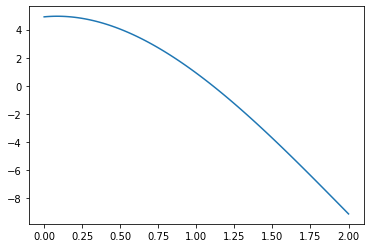

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

funcao = lambda x: x**3 - 6*x**2 + 11+x - 6.1
inicio = 0
fim = 2
nr_pontos = 100
curva = np.linspace(inicio, fim, nr_pontos)
valores = [funcao(valor) for valor in curva]
plt.plot(curva, valores, linestyle= '-')

In [ ]:
import math

def f(x):
	return (x**3 - 6*x**2 + 11*x - 6.1)

def df(x):
	h = 0.000001
	return((f(x+h) - f(x))/h)
	
def newton(x0, ite_max):
	
	x = 0.0
	precisao = 10**-5
	cont = 1
	
	while(math.fabs(f(x0)) > precisao):
		x = x0 - f(x0)/df(x0)
		x0 = x
		cont = cont + 1
		if(cont >= ite_max):
			print('RAÍZ NÃO ENCONTRADA')
			break
	if (cont < ite_max):
		print(' Raíz: %f\n Iterações: %i' %(x0,cont))

In [ ]:
newton(3.5, 3)


RAÍZ NÃO ENCONTRADA


In [ ]:
import math

def f(x):
	return (x**3 - 6*x**2 + 11*x - 6.1)
	
def secante(x0, x1, ite_max):
	
	precisao = 10**-5
	xn = 0.0
	x = []
	
	x.append(x0)
	x.append(x1)
	
	cont = 1
	n = 1
	while(math.fabs(f(x0)) > precisao):
		xn = x[n] - (x[n] - x[n-1])/(f(x[n]) - f(x[n-1]))*f(x[n])
		x.append(xn)
		n = n + 1
		cont = cont + 1
		
		if(cont >= ite_max):
			break
	print(' Raíz: %f\n Iterações: %i' %(xn,cont))

In [ ]:
secante (2.5, 3.5, 3)

 Raíz: 2.871091
 Iterações: 3


O método de newton não encontrou a raíz após 3 iterações, porém, com o número de iterações maior o método da tangente encontra uma raíz para a equação, nesse caso, testei com 10 iterações e obtive exito. O que acontece é que no caso do método de newton uma vez iniciado, o programa irá entrar em um laço que irá obter valores cada vez mais próximos da raiz da função, esse processo irá se repetir até que uma precisão pré-determinada seja alcançada no nosso caso um critério de parada, fazendo que o algoritmo necessite de mais iterações para encontrar a Raíz

Por outro lado, o método da secante, encontrou a raíz após três iterações. O que acontece é que não é necessário que a raiz da função esteja contida no intervalo e, por essa razão, é sua viabilidade em certos casos é maior. 
O método da secante é similar ao método da tangente, a diferença é que a reta secante é substituída pela tangente em um dado ponto. A substituição da tangente no método de Newton pela secante torna o método relativamente mais simples, pois não é necessário calcular a derivada da função para de obter o coeficiente angular da reta. 



Questão 3– Use o método da bissecção para determinar uma raiz de f(x) = (x/2)2–sen(x) utilizando as aproximações iniciais a= 1,5 e b= 2 e  𝜀= 0,001% . Explique seus resultados.

In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100
def f(x):
	return ((x/2)**2 - math.sin(x))

def bissec(a, b):

	amplitude = b - a
	x0 = (a + b)/2.0
	a_f = 0.001  
	precisao = 0.001
	cont = 0

	while(amplitude > a_f or math.fabs(f(x0)) > precisao):
		if(f(a)*f(x0) < 0.0):
			b = x0
		if(f(a)*f(x0) > 0.0):
			a = x0
			
		amplitude = b - a
		x0 = (a+b)/2.0
		cont = cont + 1
		if(cont >= ite_max):
			break
		
	print(' Raíz: %f\n Iterações: %i' %(x0,cont))

In [ ]:
bissec (1.5,2)

 Raíz: 1.933754
 Iterações: 29


Dada a precisao 𝜀 sendo nosso critério de parada do algoritmo, ou seja, o nosso processo iterativo é finalizado quando se obtém um intervalo cujo tamanho é menor  ou  igual a 𝜀. Temos que, quanto menor a precisão, maior o número de iterações o algoritmo vai fazer para conseguir encontrar a raíz.

Um exemplo disso foi nesse exemplo, onde pede uma precisão de 0,001% que o algoritmo acabou encontrando a raíz: 1,933754 após 11 iterações, acabei testando com uma precisão menor, sendo 𝜀 = 0.0000000001% e o algoritmo encontrou a mesma raíz, porém após 29 iterações

Questão 4– Use o método da tangente para determinar uma raiz de f(x) = x5–16,05x4+ 88,75x3–192,0375x2+ 116,35x + 31,6875 utilizando uma aproximação inicial de x0= 0,5825 e 𝜀= 0,01% . Explique seus resultados.

In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (x**5 - 16.05*x**4 + 88.75*x**3 - 192.0375*x**2 + 116.35*x + 31.6875)

def df(x):
	h = 0.000001
	return ((f(x+h) - f(x))/h)
	
def newton(x0):
	
	x = 0.0
	precisao = 0.01
	cont = 1
	
	while(math.fabs(f(x0)) > precisao):
		x = x0 - f(x0)/df(x0)
		x0 = x
		cont = cont + 1
		if(cont >= ite_max):
			print('RAÍZ NÃO ENCONTRADA')
			break
	if (cont < ite_max):
		print(' Raíz: %f\n Iterações: %i' %(x0,cont))

In [ ]:
newton(0.5825)

 Raíz: 6.500018
 Iterações: 22


Dada a precisao 𝜀 sendo nosso critério de parada do algoritmo, temos o mesmo do exemplo anterior onde, quanto menor a precisão, maior o número de iterações, porém, no método de newton, esse número de iterações se viu mais lenta.

Onde foi testado, com uma precisão de 0,01% que o algoritmo acabou encontrando a raíz: 6.500018 após 22 iterações, acabei testando com uma precisão menor, sendo 𝜀 = 0.0000000001% e o algoritmo encontrou a mesma raíz, porém após 24 iterações

Questão 5– Compare  o  desempenho  dos  métodos  da  Bissecção,  Falsa  Posição, Tangente  e Secante nas equações abaixo: 

a)f(x) = e!"!–cos(x)   𝜀1 =𝜀2 = 10 -4 𝜉∈[1, 2]

b)f(x) = x3–x–1 𝜀1 = 𝜀2 = 10 -6 𝜉∈[1,2]

c)f(x) = 4 sen(x) –e"𝜀1 =𝜀2 = 10 -5𝜉∈[0,1]

d)f(x) = x log(x) –1𝜀1 =𝜀2 = 10 -7𝜉∈[2,3]

In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (math.e**-x**2 - math.cos(x))

def bissec(a, b):

	amplitude = b - a
	x0 = (a + b)/2.0
	a_f = 0.001  
	precisao = 10**-4
	cont = 0
	
	while(amplitude > a_f or math.fabs(f(x0)) > precisao):
		amplitude = b - a
		x0 = (a+b)/2.0
		cont = cont + 1

		if(f(a)*f(x0) < 0.0):
			b = x0
		if(f(a)*f(x0) >= 0.0):
			a = x0

		if(cont >= ite_max):
			break
		
	print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))

In [ ]:
bissec(1,2)

 Raíz: 1.447266
 Iterações: 9
 f(1.447266) = -0.000095


In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (math.e**-x**2 - math.cos(x))

def posicao(a, b):
	
	amplitude = b - a
	x0 = (a*f(b) - b*f(a)) / (f(b) - f(a))
	a_f = 0.001
	precisao = 10**-4
	cont = 0
	
	while(amplitude > a_f or math.fabs(f(x0)) > precisao):
		
		amplitude = b - a
		x0 = (a*f(b) - b*f(a)) / (f(b) - f(a))
		cont = cont + 1
		
		if(f(a)*f(x0) < 0.0):
			b = x0
		if(f(a)*f(x0) >= 0.0):
			a = x0
			
		
		if(cont >= ite_max):
			break
		
	print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))

In [ ]:
posicao(1,2)

 Raíz: 1.447357
 Iterações: 6
 f(1.447357) = -0.000036


In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (math.e**-x**2 - math.cos(x))

def df(x):
	return (-2*(math.e**-x**2)*x + math.sin(x))
	
def newton(x0):
	
	x = 0.0
	precisao = 10**-5
	cont = 1
	
	while(math.fabs(f(x0)) > precisao):
		x = x0 - f(x0)/df(x0)
		x0 = x
		cont = cont + 1
		if(cont >= ite_max):
			print('RAÍZ NÃO ENCONTRADA')
			break
	if (cont < ite_max):
		print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))
      

In [ ]:
newton(1)

 Raíz: -1.447414
 Iterações: 11
 f(-1.447414) = 0.000000


In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (math.e**-x**2 - math.cos(x))
	
def secante(x0, x1):
	
	precisao = 10**-5
	xn = 0.0
	x = []
	
	x.append(x0)
	x.append(x1)
	
	cont = 1
	n = 1
	while(math.fabs(f(x0)) > precisao):
		xn = x[n] - (x[n] - x[n-1])/(f(x[n]) - f(x[n-1]))*f(x[n])
		x.append(xn)
		n = n + 1
		cont = cont + 1
		
		if(cont >= ite_max):
			break
	print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))

In [ ]:
secante(5,3)

In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (x**3 -x -1)

def bissec(a, b):

	amplitude = b - a
	x0 = (a + b)/2.0
	a_f = 0.001  
	precisao = 10**-6
	cont = 0
	
	while(amplitude > a_f or math.fabs(f(x0)) > precisao):
		amplitude = b - a
		x0 = (a+b)/2.0
		cont = cont + 1

		if(f(a)*f(x0) < 0.0):
			b = x0
		if(f(a)*f(x0) >= 0.0):
			a = x0

		if(cont >= ite_max):
			break
		
	print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))

In [ ]:
bissec(1,2)

 Raíz: 1.324718
 Iterações: 21
 f(1.324718) = 0.000000


In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (x**3 -x -1)

def posicao(a, b):
	
	amplitude = b - a
	x0 = (a*f(b) - b*f(a)) / (f(b) - f(a))
	a_f = 0.001
	precisao = 10**-6
	cont = 0
	
	while(amplitude > a_f or math.fabs(f(x0)) > precisao):
		
		amplitude = b - a
		x0 = (a*f(b) - b*f(a)) / (f(b) - f(a))
		cont = cont + 1
		
		if(f(a)*f(x0) < 0.0):
			b = x0
		if(f(a)*f(x0) >= 0.0):
			a = x0
			
		
		if(cont >= ite_max):
			break
		
	print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))

In [ ]:
posicao(1,2)

 Raíz: 1.324718
 Iterações: 17
 f(1.324718) = -0.000001


In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (x**3 -x -1)

def df(x):
	return (3*x**2 - 1)
	
def newton(x0):
	
	x = 0.0
	precisao = 10**-6
	cont = 1
	
	while(math.fabs(f(x0)) > precisao):
		x = x0 - f(x0)/df(x0)
		x0 = x
		cont = cont + 1
		if(cont >= ite_max):
			print('RAÍZ NÃO ENCONTRADA')
			break
	if (cont < ite_max):
		print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))
      

In [ ]:
newton(1)

 Raíz: 1.324718
 Iterações: 5
 f(1.324718) = 0.000001


In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (x**3 -x -1)
	
def secante(x0, x1):
	
	precisao = 10**-6
	xn = 0.0
	x = []
	
	x.append(x0)
	x.append(x1)
	
	cont = 1
	n = 1
	while(math.fabs(f(x0)) > precisao):
		xn = x[n] - (x[n] - x[n-1])/(f(x[n]) - f(x[n-1]))*f(x[n])
		x.append(xn)
		n = n + 1
		cont = cont + 1
		
		if(cont >= ite_max):
			break
	print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))

In [ ]:
secante(1,2)

In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (4*math.sin(x) - math.e**x)

def bissec(a, b):

	amplitude = b - a
	x0 = (a + b)/2.0
	a_f = 0.001  
	precisao = 10**-5
	cont = 0
	
	while(amplitude > a_f or math.fabs(f(x0)) > precisao):
		amplitude = b - a
		x0 = (a+b)/2.0
		cont = cont + 1

		if(f(a)*f(x0) < 0.0):
			b = x0
		if(f(a)*f(x0) >= 0.0):
			a = x0

		if(cont >= ite_max):
			break
		
	print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))

In [ ]:
bissec(0,1)

 Raíz: 0.370560
 Iterações: 16
 f(0.370560) = 0.000004


In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (4*math.sin(x) - math.e**x)

def posicao(a, b):
	
	amplitude = b - a
	x0 = (a*f(b) - b*f(a)) / (f(b) - f(a))
	a_f = 0.001
	precisao = 10**-5
	cont = 0
	
	while(amplitude > a_f or math.fabs(f(x0)) > precisao):
		
		amplitude = b - a
		x0 = (a*f(b) - b*f(a)) / (f(b) - f(a))
		cont = cont + 1
		
		if(f(a)*f(x0) < 0.0):
			b = x0
		if(f(a)*f(x0) >= 0.0):
			a = x0
			
		
		if(cont >= ite_max):
			break
		
	print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))

In [ ]:
posicao(0,1)

 Raíz: 0.370559
 Iterações: 8
 f(0.370559) = 0.000002


In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (4*math.sin(x) - math.e**x)

def df(x):
	return (4*math.cos(x) - math.e**x)
	
def newton(x0):
	
	x = 0.0
	precisao = 10**-5
	cont = 1
	
	while(math.fabs(f(x0)) > precisao):
		x = x0 - f(x0)/df(x0)
		x0 = x
		cont = cont + 1
		if(cont >= ite_max):
			print('RAÍZ NÃO ENCONTRADA')
			break
	if (cont < ite_max):
		print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))
      

In [ ]:
newton(0)

 Raíz: 0.370558
 Iterações: 4
 f(0.370558) = -0.000001


In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (4*math.sin(x) - math.e**x)
	
def secante(x0, x1):
	
	precisao = 10**-6
	xn = 0.0
	x = []
	
	x.append(x0)
	x.append(x1)
	
	cont = 1
	n = 1
	while(math.fabs(f(x0)) > precisao):
		xn = x[n] - (x[n] - x[n-1])/(f(x[n]) - f(x[n-1]))*f(x[n])
		x.append(xn)
		n = n + 1
		cont = cont + 1
		
		if(cont >= ite_max):
			break
	print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))

In [ ]:
secante(0,1)

In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (x*math.log(x) - 1)

def bissec(a, b):

	amplitude = b - a
	x0 = (a + b)/2.0
	a_f = 0.001  
	precisao = 10**-7
	cont = 0
	
	while(amplitude > a_f or math.fabs(f(x0)) > precisao):
		amplitude = b - a
		x0 = (a+b)/2.0
		cont = cont + 1

		if(f(a)*f(x0) < 0.0):
			b = x0
		if(f(a)*f(x0) >= 0.0):
			a = x0

		if(cont >= ite_max):
			break
		
	print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))

In [ ]:
bissec(2,3)

 Raíz: 3.000000
 Iterações: 100
 f(3.000000) = 2.295837


In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (x*math.log(x) - 1)

def posicao(a, b):
	
	amplitude = b - a
	x0 = (a*f(b) - b*f(a)) / (f(b) - f(a))
	a_f = 0.001
	precisao = 10**-7
	cont = 0
	
	while(amplitude > a_f or math.fabs(f(x0)) > precisao):
		
		amplitude = b - a
		x0 = (a*f(b) - b*f(a)) / (f(b) - f(a))
		cont = cont + 1
		
		if(f(a)*f(x0) < 0.0):
			b = x0
		if(f(a)*f(x0) >= 0.0):
			a = x0
			
		
		if(cont >= ite_max):
			break
		
	print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))

In [ ]:
posicao(2,3)

 Raíz: 1.763223
 Iterações: 100
 f(1.763223) = 0.000000


In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (x*math.log(x) - 1)

def df(x):
	return (math.log10(x) + 1/math.log(10))
	
def newton(x0):
	
	x = 0.0
	precisao = 10**-5
	cont = 1
	
	while(math.fabs(f(x0)) > precisao):
		x = x0 - f(x0)/df(x0)
		x0 = x
		cont = cont + 1
		if(cont >= ite_max):
			print('RAÍZ NÃO ENCONTRADA')
			break
	if (cont < ite_max):
		print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))

In [ ]:
newton(2)

In [ ]:
import math

#neste caso, como o número de iterações máximas não é especificado, defini um padrão de 100 iterações
ite_max = 100

def f(x):
	return (x*math.log(x) - 1)
	
def secante(x0, x1):
	
	precisao = 10**-6
	xn = 0.0
	x = []
	
	x.append(x0)
	x.append(x1)
	
	cont = 1
	n = 1
	while(math.fabs(f(x0)) > precisao):
		xn = x[n] - (x[n] - x[n-1])/(f(x[n]) - f(x[n-1]))*f(x[n])
		x.append(xn)
		n = n + 1
		cont = cont + 1
		
		if(cont >= ite_max):
			break
	print(' Raíz: %f\n Iterações: %i\n f(%f) = %f' %(x0,cont,x0,f(x0)))

In [ ]:
secante(2,3)

Na maioria dos casos, no que se trata de número de iterações, o algoritmo que teve um número elevado de casos iterados foi o da bissecção, pois o mesmo efetua calculos simples por iteração. Do ponto de vista de esforço computacional, não é uma virtude, pois o número de iterações é uma medida usualmente adotada para a determinação da rapidez de convergência de um método.

Número de iterações da Bissecção é, na grande maioria das vezes, muito maior do que o número de iterações efetuadas por Newton, por exemplo, por outro lado, se a derivada da função for complicada, entramos em outra parte do esforço computacional, não sendo tão eficiente o método de newton por exemplo.

Na escolha do melhor método, a minha opinião é variável, e depende muito do problema que temos, por exemplo, se é fácil a verificação das condições de convergência e o cálculo da derivada, é uma boa alternativa optar pelo método de newton, por outro lado, caso seja trabalhoso obter derivada da função, podemos optar pelo método da secante.

Os métodos de newton e secante são, de fato, os que se mostraram mais rápidos, porém eles tem condições mais restritivas de convergência. Os métodos da bissecção e da falsa posição, por sua vez, possuem convergência garantida, desde que, a função seja contínua em um intervalo [a,b]